In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\a0970\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [28]:
%matplotlib inline

In [33]:
def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights= tf.Variable(tf.random_normal([in_size,out_size]))
    biases= tf.Variable(tf.zeros([1,out_size])+0.1)
    #matmul為矩陣相乘
    Wx_plus_b= tf.matmul(inputs,Weights)+ biases
    if activation_function is None:
        #若是None則是線性關係
        outputs= Wx_plus_b
    else:
        #在輸出前先經過一激勵函數壓縮
        outputs= activation_function(Wx_plus_b)
        
    return outputs

In [34]:
#Make up some real data
x_data= np.linspace(-1,1,300)[:,np.newaxis]
#make some noise XD
noise= np.random.normal(0,0.05,x_data.shape)
y_data= np.square(x_data)- 0.5+ noise

In [55]:
xs= tf.placeholder(tf.float32,[None,1])
ys= tf.placeholder(tf.float32,[None,1])
#add hidden layer
l1= add_layer(xs,1,10,activation_function=tf.nn.relu)
#add output layer
prediction= add_layer(l1,10,1,activation_function=tf.nn.softplus)
#define loss function
loss= tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),\
                                  reduction_indices=[1]))
#minimize loss function
train_step= tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [56]:
#initialize the Variable
init= tf.global_variables_initializer()

In [71]:
with tf.Session() as sess:
    #initialize the Variable
    sess.run(init)
    
    for i in range(1000):
        sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
       
        if i %50==0:
            print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
                    
            
    
    
   

0.4246748
0.17752469
0.14740956
0.13630696
0.13081612
0.12764299
0.1256246
0.124252945
0.123271726
0.12254267
0.12198382
0.12154477
0.12119225
0.12090467
0.12066583
0.12046478
0.12029268
0.12014432
0.120015144
0.11990246


In [70]:
losses

ValueError: x and y must not be None

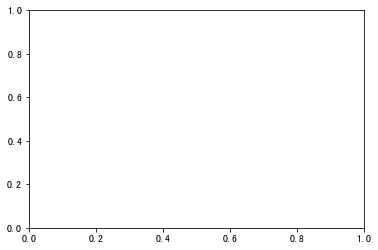

In [66]:
plt.plot(losses)